# Maschinelles Lernen
# Aufgabenblatt 04 - Aufgabe 04
# Prof. Dr. David Spieler

In [1]:
import csv
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plot
import numpy as np

matplotlib.rcParams['figure.figsize'] = (14, 12)

In [3]:
def load_data(filename):
    """
    load a 2-d dataset with labels from a csv file
    """
    with open(filename, 'r') as csvfile:
        pointreader = csv.reader(csvfile, delimiter=',')
        x1 = []
        x2 = []
        y = []
        for row in pointreader:
            x1.append(float(row[1]))
            x2.append(float(row[2]))
            y.append(-1.0 if float(row[0]) == -1.0 else 1.0)
    return np.array(x1), np.array(x2), np.array(y)

# load linearly seperable dataset https://github.com/cuekoo/Binary-classification-dataset
x1, x2, y = load_data('linsep.csv')

# shuffle data to prevent unwanted effects during learning
s = np.arange(x1.shape[0])
np.random.shuffle(s)
x1 = x1[s]
x2 = x2[s]
y = y[s]

# Überblick

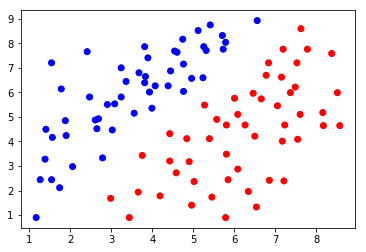

In [4]:
plot.scatter(x1, x2, c=y, cmap=matplotlib.colors.ListedColormap(['red', 'blue']))

# Implementierung

In [5]:
def adaline_sum(x1, x2, w):
    """
    compute the weighted sum w*x used for Adaline classification
    """
    return w[0] + x1 * w[1] + x2 * w[2]

def adaline_classify(x1, x2, w):
    """
    classify a 2-d data point [x1,x2]^T via the weights w=[w0,w1,w2]^T
    """
    return 1.0 if adaline_sum(x1, x2, w) > 0.0 else -1.0
    
def adaline_visualize(x1, x2, y, w):
    """
    scatter plot the data points and add a plot of the decision surface
    """
    plot.figure()
    plot.scatter(x1, x2, c=y, cmap=matplotlib.colors.ListedColormap(['red', 'blue']))
    plot.plot([x1.min(), x1.max()], [-(w[0] + w[1] * x1.min()) / w[2] , -(w[0] + w[1] * x1.max()) / w[2]])
    
def adaline_learn_step(x1, x2, y, w, eta):
    """
    perform a full Adaline learning step over all data points [x1_i,x2_i]^T 
    with labels y_i, update the weights w accordingly with learning rate eta
    and return the new weights
    """
    for x1_i, x2_i, y_i in zip(x1, x2, y):
        yp_i = adaline_sum(x1_i, x2_i, w)
        
        w[0] = w[0] + eta * (y_i - yp_i) * 1.0
        w[1] = w[1] + eta * (y_i - yp_i) * x1_i
        w[2] = w[2] + eta * (y_i - yp_i) * x2_i
        
    return w

def adaline_accuracy(x1, x2, y, w):
    """
    compute the accuracy when applying the Adaline with weights w to all 
    data points [x1_i,x2_i]^T with labels y_i
    """ 
    correct = 0.0
    for x1_i, x2_i, y in zip(x1, x2, y):
        if adaline_classify(x1_i, x2_i, w) == y:
            correct = correct + 1.0
    return correct / len(x1)

def adaline_learn(x1, x2, y, eta, gamma):
    """
    implementation of the Adaline learning algorithm on data points 
    [x1_i,x2_i]^T with labels y_i, accuracy threshold gamma, and learning rate
    eta; a visualization should be plotted every 20 iterations
    """
    rho = 0
    w = [0.1, 0.2, 0.3]
    iteration = 0
    while (rho < gamma):
        w = adaline_learn_step(x1, x2, y, w, eta)
        rho = adaline_accuracy(x1, x2, y, w)
        print("iteration=",iteration,"accuracy=", rho, "w=", w)
        if iteration % 20 == 0:
            adaline_visualize(x1, x2, y, w)
        iteration += 1
    adaline_visualize(x1, x2, y, w)
    return w

# Training

iteration= 0 accuracy= 0.84 w= [0.05357167059732967, -0.1480439605186374, 0.09079094751582664]
iteration= 1 accuracy= 0.95 w= [0.05776303707466966, -0.21068403624040402, 0.1491839913250842]
iteration= 2 accuracy= 0.97 w= [0.06230274593744793, -0.255397816330952, 0.19174268862286528]
iteration= 3 accuracy= 0.99 w= [0.06697534898625418, -0.2877426710273245, 0.22228411063524225]
iteration= 4 accuracy= 0.99 w= [0.07173091096824871, -0.311175995614505, 0.2441662519292911]
iteration= 5 accuracy= 0.99 w= [0.07653387137608181, -0.3281873030106311, 0.2598103585072971]
iteration= 6 accuracy= 0.99 w= [0.08135871952022453, -0.3405703264014037, 0.2709609661884802]
iteration= 7 accuracy= 0.99 w= [0.08618718386333286, -0.3496174848462336, 0.27887502688708365]
iteration= 8 accuracy= 0.99 w= [0.09100620779893336, -0.35625999373382333, 0.2844581818041813]
iteration= 9 accuracy= 0.99 w= [0.09580649118392436, -0.36116881624375113, 0.2883629481159672]
iteration= 10 accuracy= 0.99 w= [0.10058143950165985, -

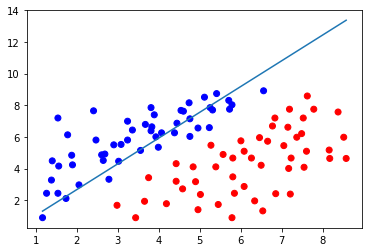

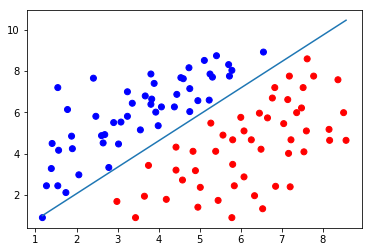

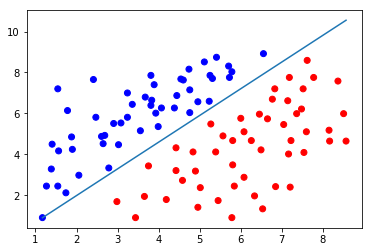

In [6]:
w = adaline_learn(x1, x2, y, 0.001, 1.0)

In [7]:
w

[0.18432690243647487, -0.380848202988254, 0.29164976169827367]

# Aufgabe 4.2
- Es werden 30 Iterationen benötigt.
- Die finalen Gewichte sind $\mathbf{w} = (0.18432690243647487, -0.380848202988254, 0.29164976169827367)^T$

iteration= 0 accuracy= 0.5 w= [0.07983404750111389, 0.08131692346258079, 0.19217509120187246]
iteration= 1 accuracy= 0.5 w= [0.06851691516798955, 0.009785886881378767, 0.1343787186855826]
iteration= 2 accuracy= 0.52 w= [0.06224394613932807, -0.03475044451565965, 0.10497472363678366]
iteration= 3 accuracy= 0.66 w= [0.058846920579840964, -0.06378313877497825, 0.09163703160600337]
iteration= 4 accuracy= 0.85 w= [0.057090179617485776, -0.08386447608907983, 0.08734500189328351]
iteration= 5 accuracy= 0.96 w= [0.05626950619694507, -0.09873213781803963, 0.08810129410379994]
iteration= 6 accuracy= 0.99 w= [0.055983538551989176, -0.1105197257697639, 0.0916313484742748]
iteration= 7 accuracy= 1.0 w= [0.05600350514695753, -0.12044660676930771, 0.09664226004845936]


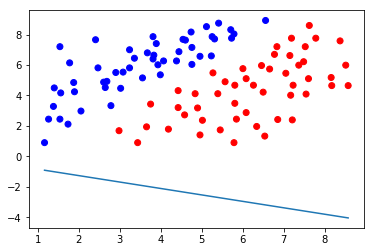

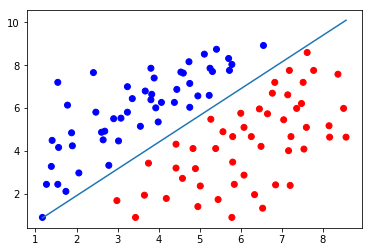

In [10]:
w4 = adaline_learn(x1, x2, y, 0.0001, 1.0)

iteration= 0 accuracy= 0.5 w= [0.09745340148270766, 0.1852714802898438, 0.2862592233132268]
iteration= 1 accuracy= 0.5 w= [0.09504778182261304, 0.17129490393099203, 0.2733145273205381]
iteration= 2 accuracy= 0.5 w= [0.09277545983830174, 0.15802945465043539, 0.2611223728904443]
iteration= 3 accuracy= 0.5 w= [0.09062917295476579, 0.14543654007455897, 0.24964159421159837]
iteration= 4 accuracy= 0.5 w= [0.08860205438996642, 0.1334796705314705, 0.23883326944857097]
iteration= 5 accuracy= 0.5 w= [0.08668761158469732, 0.12212434445842532, 0.22866059844670697]
iteration= 6 accuracy= 0.5 w= [0.08487970580798947, 0.1113379400543808, 0.2190887871019009]
iteration= 7 accuracy= 0.5 w= [0.08317253287399287, 0.10108961283732822, 0.2100849380320622]
iteration= 8 accuracy= 0.5 w= [0.08156060490976132, 0.09135019878460052, 0.20161794720683704]
iteration= 9 accuracy= 0.5 w= [0.08003873311666654, 0.08209212275189136, 0.19365840621087038]
iteration= 10 accuracy= 0.5 w= [0.07860201147129159, 0.0732893118833

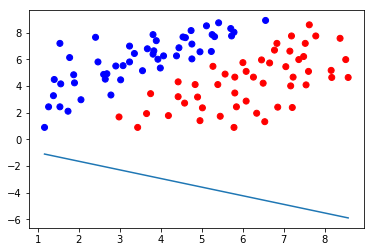

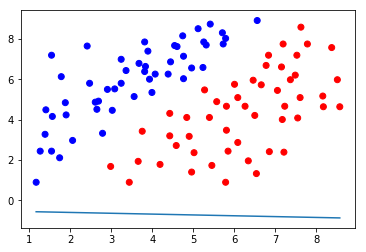

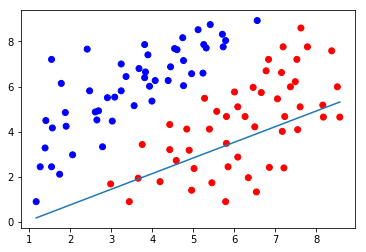

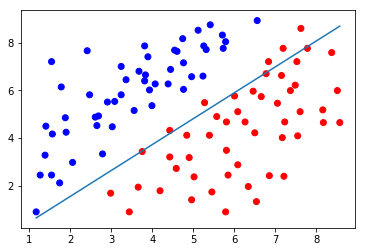

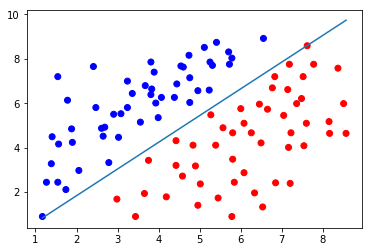

In [11]:
w4 = adaline_learn(x1, x2, y, 0.00001, 1.0)

iteration= 0 accuracy= 0.9 w= [0.0757860534791388, -0.4093355963811539, 0.2815690684789213]
iteration= 1 accuracy= 0.9 w= [0.11741410628548754, -0.4222508530679682, 0.28641704186951633]
iteration= 2 accuracy= 0.91 w= [0.15563013085897118, -0.42560434154981186, 0.28238167998253083]
iteration= 3 accuracy= 0.91 w= [0.19058584406696666, -0.4284020786000175, 0.27842147475476425]
iteration= 4 accuracy= 0.91 w= [0.22255533423267398, -0.4309522256979789, 0.274791019528572]
iteration= 5 accuracy= 0.91 w= [0.25179358152493475, -0.43328423339260863, 0.27147045157800753]
iteration= 6 accuracy= 0.92 w= [0.2785339195429606, -0.43541700212889045, 0.2684335608131684]
iteration= 7 accuracy= 0.92 w= [0.30298975187601734, -0.4373675618855196, 0.26565612027757207]
iteration= 8 accuracy= 0.92 w= [0.3253562505563266, -0.4391514795789694, 0.2631159646434015]
iteration= 9 accuracy= 0.91 w= [0.3458119135000419, -0.4407829919391221, 0.2607928219724756]
iteration= 10 accuracy= 0.91 w= [0.3645199890217229, -0.442

iteration= 239 accuracy= 0.91 w= [0.5647915661985342, -0.4582484737951915, 0.23592337742548752]
iteration= 240 accuracy= 0.91 w= [0.5647915662210045, -0.4582484737969838, 0.23592337742293565]
iteration= 241 accuracy= 0.91 w= [0.5647915662415551, -0.4582484737986228, 0.23592337742060168]
iteration= 242 accuracy= 0.91 w= [0.5647915662603502, -0.4582484738001219, 0.23592337741846714]
iteration= 243 accuracy= 0.91 w= [0.564791566277539, -0.4582484738014928, 0.23592337741651498]
iteration= 244 accuracy= 0.91 w= [0.564791566293259, -0.4582484738027467, 0.23592337741472977]
iteration= 245 accuracy= 0.91 w= [0.5647915663076363, -0.4582484738038934, 0.2359233774130969]
iteration= 246 accuracy= 0.91 w= [0.5647915663207855, -0.45824847380494205, 0.23592337741160346]
iteration= 247 accuracy= 0.91 w= [0.5647915663328111, -0.45824847380590134, 0.23592337741023783]
iteration= 248 accuracy= 0.91 w= [0.5647915663438097, -0.4582484738067785, 0.2359233774089887]
iteration= 249 accuracy= 0.91 w= [0.564791

iteration= 341 accuracy= 0.91 w= [0.564791566461519, -0.45824847381616685, 0.2359233773956205]
iteration= 342 accuracy= 0.91 w= [0.5647915664615216, -0.4582484738161671, 0.23592337739562028]
iteration= 343 accuracy= 0.91 w= [0.564791566461524, -0.4582484738161673, 0.23592337739561992]
iteration= 344 accuracy= 0.91 w= [0.5647915664615265, -0.4582484738161674, 0.23592337739561964]
iteration= 345 accuracy= 0.91 w= [0.5647915664615287, -0.45824847381616757, 0.23592337739561933]
iteration= 346 accuracy= 0.91 w= [0.5647915664615304, -0.45824847381616773, 0.23592337739561922]
iteration= 347 accuracy= 0.91 w= [0.5647915664615321, -0.4582484738161679, 0.23592337739561905]
iteration= 348 accuracy= 0.91 w= [0.5647915664615335, -0.45824847381616796, 0.23592337739561878]
iteration= 349 accuracy= 0.91 w= [0.5647915664615348, -0.4582484738161681, 0.2359233773956187]
iteration= 350 accuracy= 0.91 w= [0.5647915664615358, -0.4582484738161682, 0.23592337739561858]
iteration= 351 accuracy= 0.91 w= [0.5647

/home/realytic/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


iteration= 481 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 482 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 483 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 484 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 485 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 486 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 487 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 488 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 489 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 490 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 491 accuracy= 0.91 w= [0.5647

iteration= 581 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 582 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 583 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 584 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 585 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 586 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 587 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 588 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 589 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 590 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 591 accuracy= 0.91 w= [0.5647

iteration= 701 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 702 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 703 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 704 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 705 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 706 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 707 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 708 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 709 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 710 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 711 accuracy= 0.91 w= [0.5647

iteration= 821 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 822 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 823 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 824 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 825 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 826 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 827 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 828 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 829 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 830 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 831 accuracy= 0.91 w= [0.5647

iteration= 961 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 962 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 963 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 964 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 965 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 966 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 967 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 968 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 969 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 970 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 971 accuracy= 0.91 w= [0.5647

iteration= 1081 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1082 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1083 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1084 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1085 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1086 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1087 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1088 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1089 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1090 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1091 accuracy= 0.91

iteration= 1201 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1202 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1203 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1204 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1205 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1206 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1207 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1208 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1209 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1210 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1211 accuracy= 0.91

iteration= 1301 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1302 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1303 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1304 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1305 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1306 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1307 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1308 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1309 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1310 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1311 accuracy= 0.91

iteration= 1401 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1402 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1403 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1404 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1405 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1406 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1407 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1408 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1409 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1410 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1411 accuracy= 0.91

iteration= 1488 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1489 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1490 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1491 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1492 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1493 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1494 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1495 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1496 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1497 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1498 accuracy= 0.91

iteration= 1621 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1622 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1623 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1624 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1625 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1626 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1627 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1628 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1629 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1630 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1631 accuracy= 0.91

iteration= 1741 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1742 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1743 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1744 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1745 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1746 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1747 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1748 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1749 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1750 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1751 accuracy= 0.91

iteration= 1881 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1882 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1883 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1884 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1885 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1886 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1887 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1888 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1889 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1890 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1891 accuracy= 0.91

iteration= 1981 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1982 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1983 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1984 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1985 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1986 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1987 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1988 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1989 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1990 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 1991 accuracy= 0.91

iteration= 2071 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2072 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2073 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2074 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2075 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2076 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2077 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2078 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2079 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2080 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2081 accuracy= 0.91

iteration= 2161 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2162 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2163 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2164 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2165 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2166 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2167 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2168 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2169 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2170 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2171 accuracy= 0.91

iteration= 2361 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2362 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2363 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2364 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2365 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2366 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2367 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2368 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2369 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2370 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2371 accuracy= 0.91

iteration= 2501 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2502 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2503 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2504 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2505 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2506 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2507 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2508 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2509 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2510 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2511 accuracy= 0.91

iteration= 2654 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2655 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2656 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2657 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2658 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2659 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2660 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2661 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2662 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2663 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2664 accuracy= 0.91

iteration= 2781 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2782 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2783 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2784 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2785 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2786 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2787 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2788 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2789 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2790 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2791 accuracy= 0.91

iteration= 2901 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2902 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2903 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2904 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2905 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2906 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2907 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2908 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2909 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2910 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 2911 accuracy= 0.91

iteration= 3041 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3042 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3043 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3044 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3045 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3046 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3047 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3048 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3049 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3050 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3051 accuracy= 0.91

iteration= 3161 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3162 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3163 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3164 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3165 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3166 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3167 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3168 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3169 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3170 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3171 accuracy= 0.91

iteration= 3301 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3302 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3303 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3304 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3305 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3306 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3307 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3308 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3309 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3310 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3311 accuracy= 0.91

iteration= 3501 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3502 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3503 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3504 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3505 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3506 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3507 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3508 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3509 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3510 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3511 accuracy= 0.91

iteration= 3641 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3642 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3643 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3644 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3645 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3646 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3647 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3648 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3649 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3650 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3651 accuracy= 0.91

iteration= 3761 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3762 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3763 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3764 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3765 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3766 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3767 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3768 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3769 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3770 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3771 accuracy= 0.91

iteration= 3921 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3922 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3923 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3924 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3925 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3926 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3927 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3928 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3929 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3930 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 3931 accuracy= 0.91

iteration= 4070 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4071 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4072 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4073 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4074 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4075 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4076 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4077 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4078 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4079 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4080 accuracy= 0.91

iteration= 4201 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4202 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4203 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4204 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4205 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4206 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4207 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4208 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4209 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4210 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4211 accuracy= 0.91

iteration= 4319 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4320 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4321 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4322 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4323 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4324 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4325 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4326 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4327 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4328 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4329 accuracy= 0.91

iteration= 4441 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4442 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4443 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4444 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4445 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4446 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4447 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4448 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4449 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4450 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4451 accuracy= 0.91

iteration= 4652 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4653 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4654 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4655 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4656 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4657 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4658 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4659 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4660 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4661 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4662 accuracy= 0.91

iteration= 4801 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4802 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4803 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4804 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4805 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4806 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4807 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4808 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4809 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4810 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4811 accuracy= 0.91

iteration= 4941 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4942 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4943 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4944 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4945 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4946 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4947 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4948 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4949 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4950 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 4951 accuracy= 0.91

iteration= 5101 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5102 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5103 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5104 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5105 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5106 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5107 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5108 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5109 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5110 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5111 accuracy= 0.91

iteration= 5235 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5236 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5237 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5238 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5239 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5240 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5241 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5242 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5243 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5244 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5245 accuracy= 0.91

iteration= 5381 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5382 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5383 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5384 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5385 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5386 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5387 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5388 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5389 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5390 accuracy= 0.91 w= [0.5647915664615468, -0.4582484738161691, 0.23592337739561733]
iteration= 5391 accuracy= 0.91

KeyboardInterrupt: 

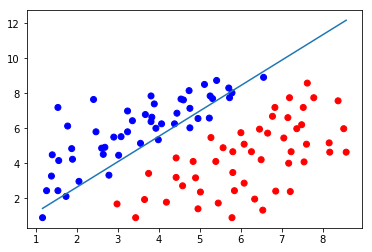

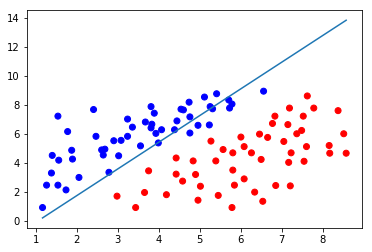

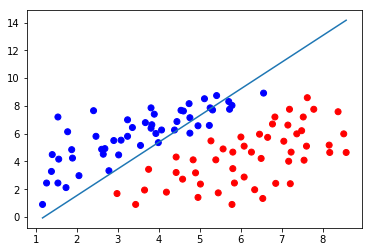

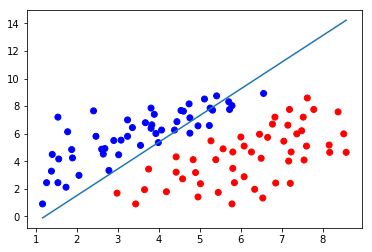

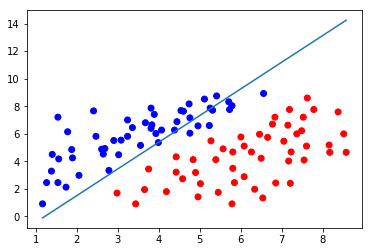

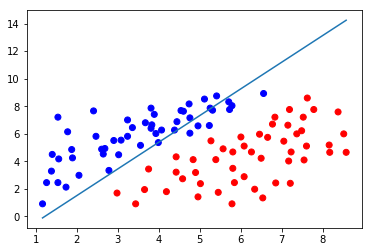

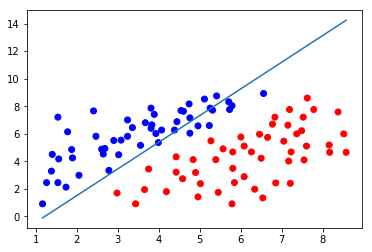

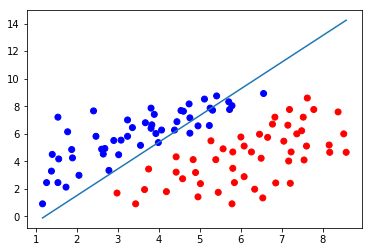

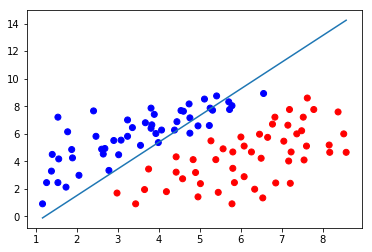

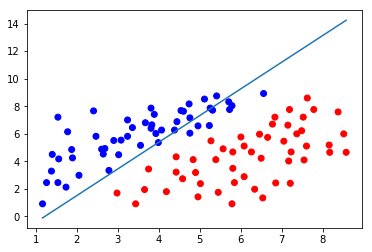

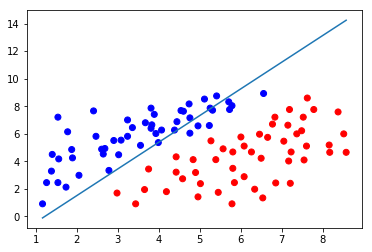

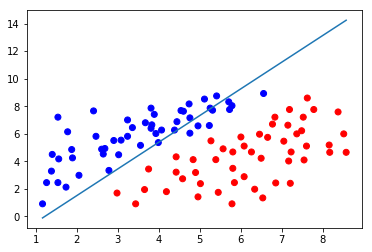

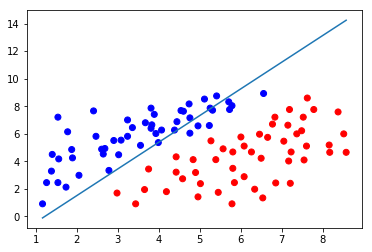

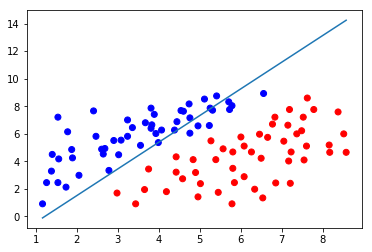

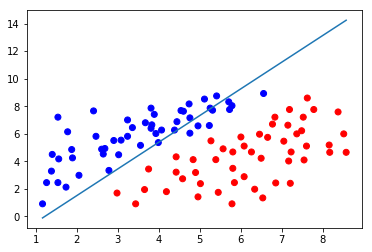

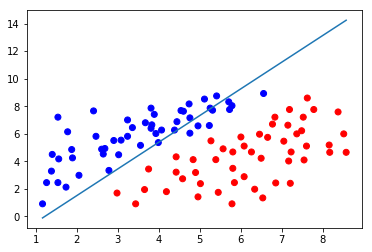

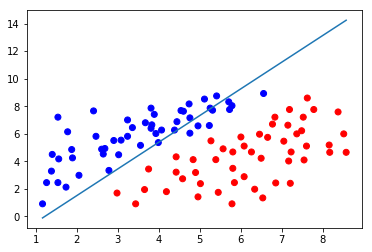

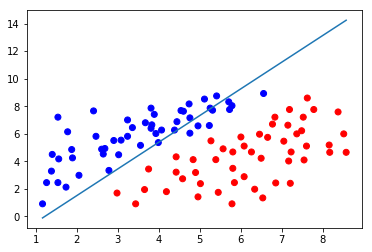

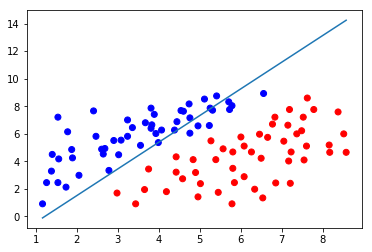

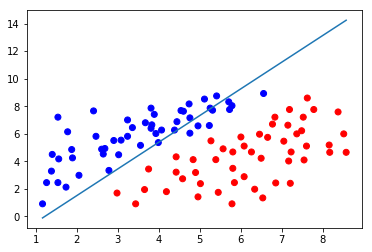

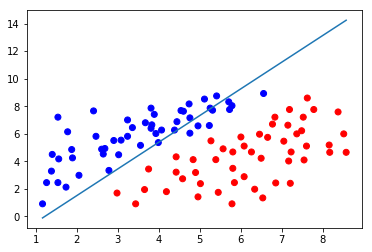

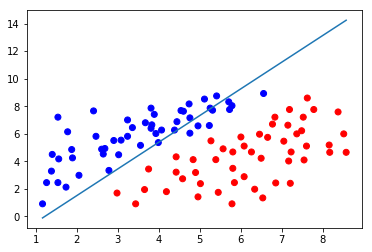

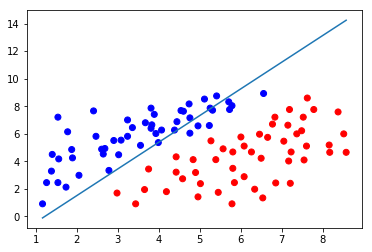

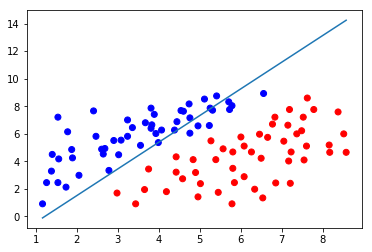

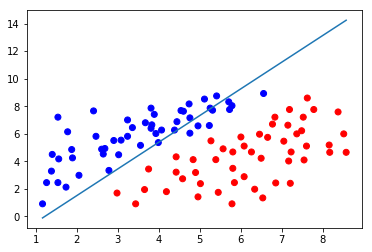

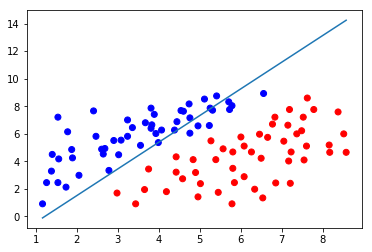

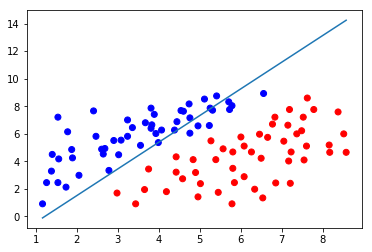

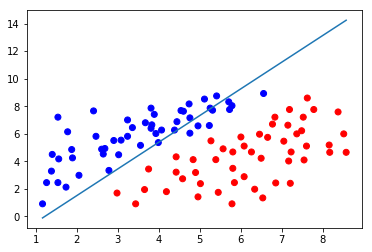

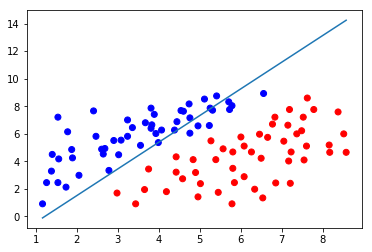

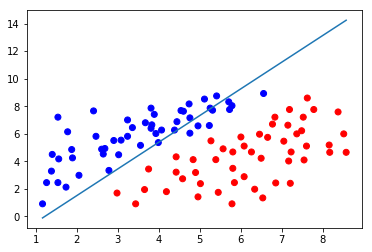

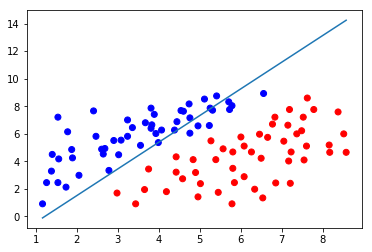

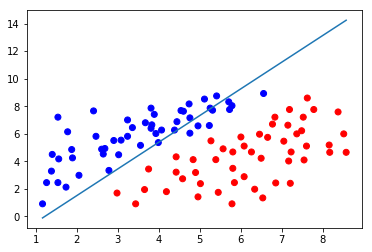

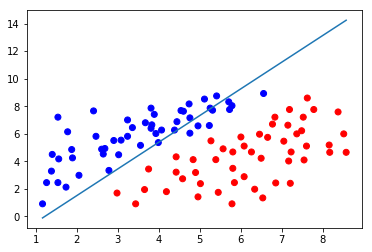

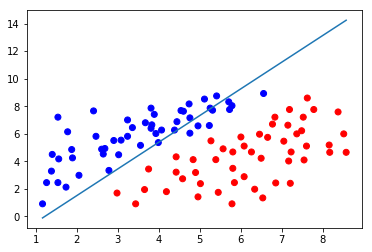

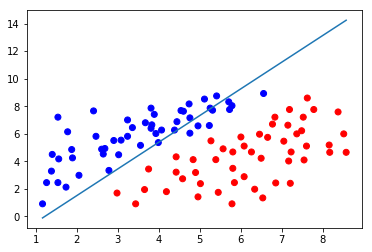

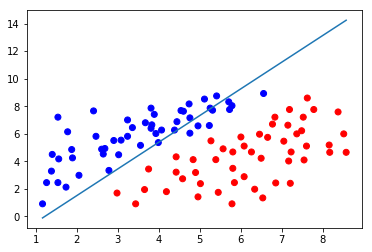

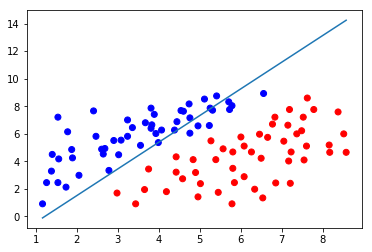

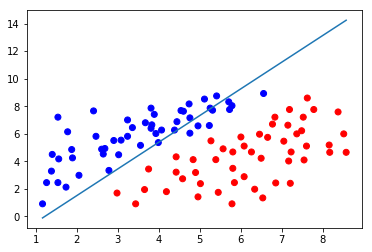

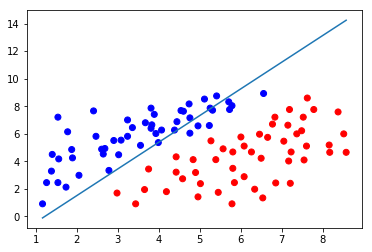

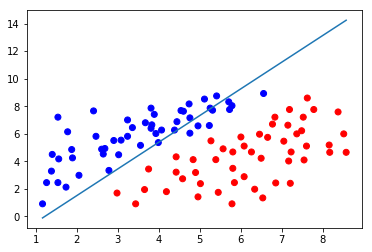

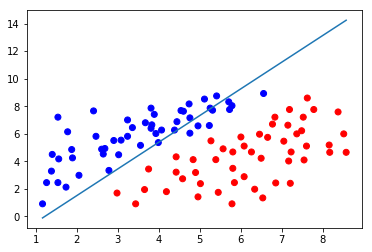

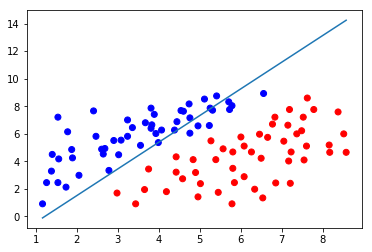

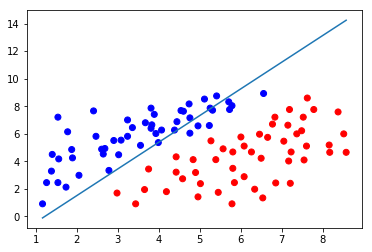

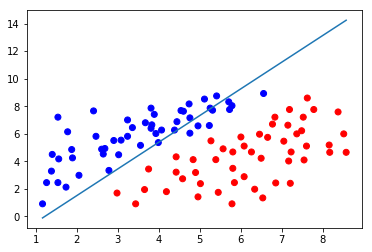

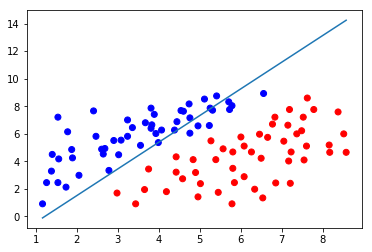

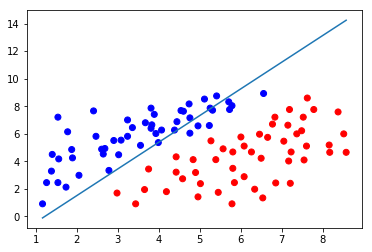

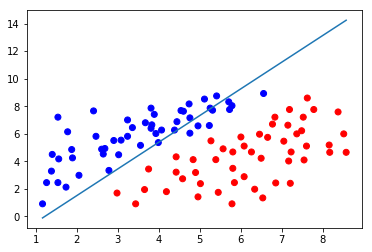

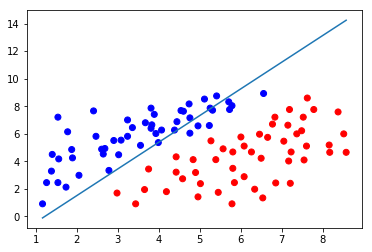

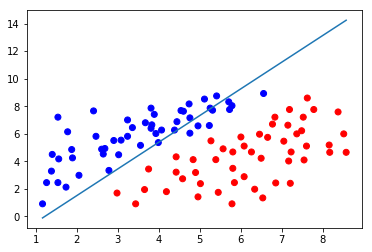

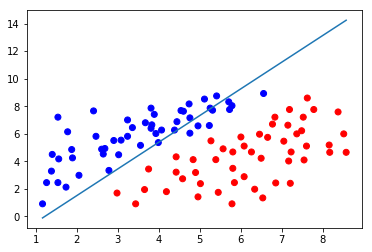

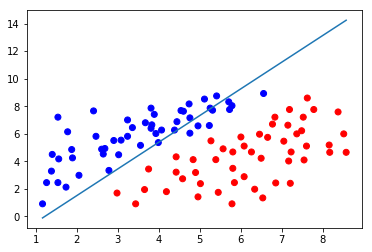

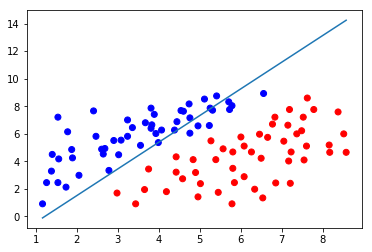

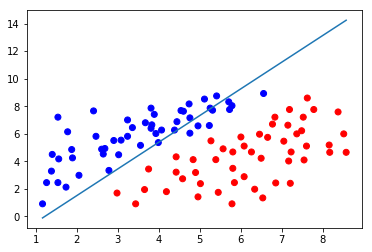

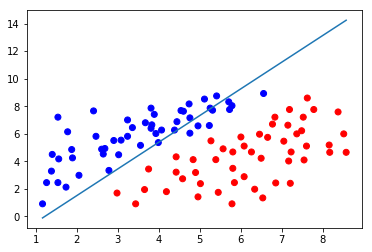

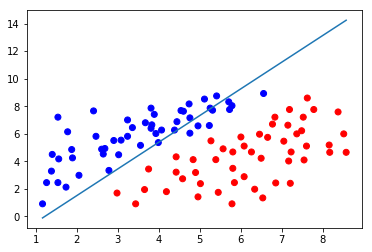

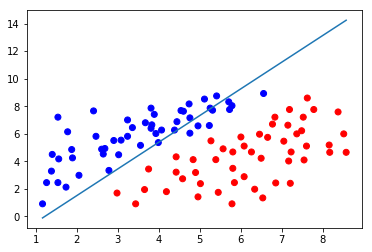

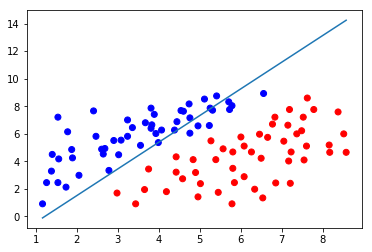

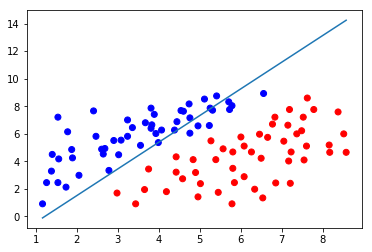

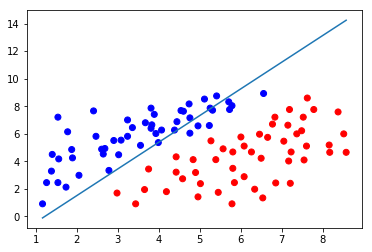

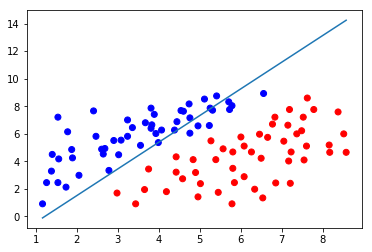

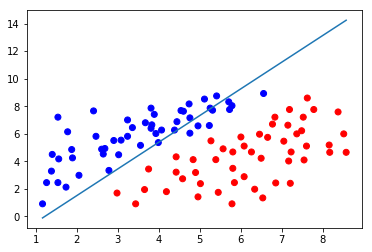

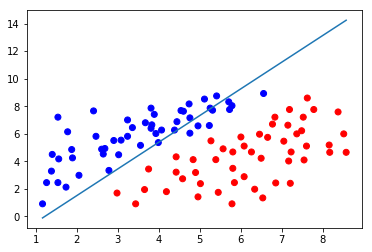

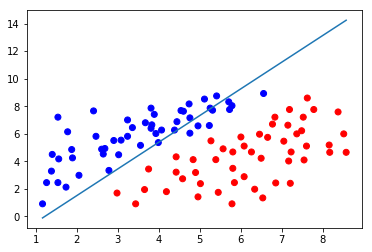

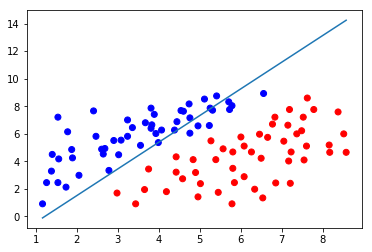

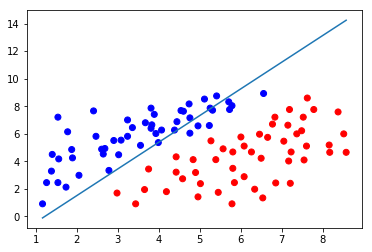

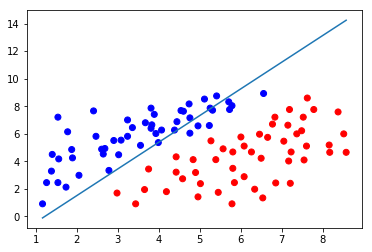

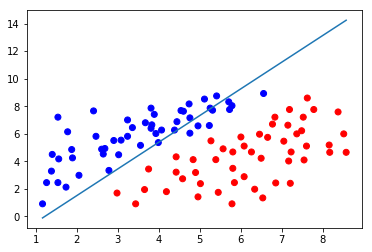

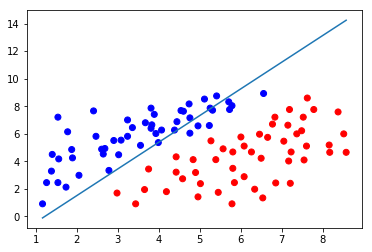

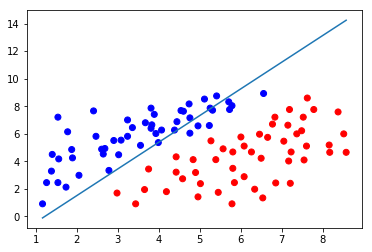

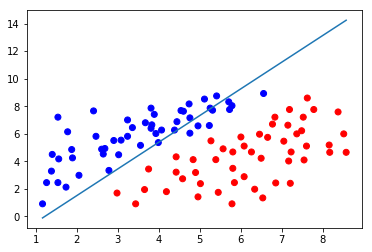

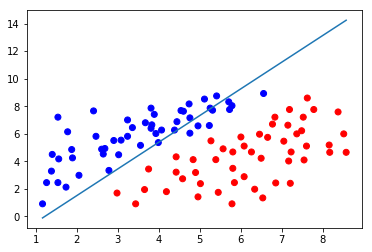

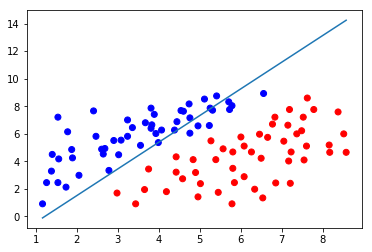

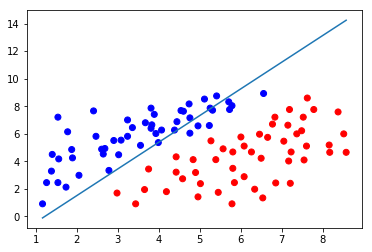

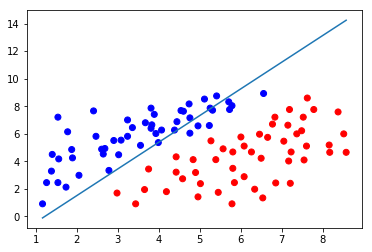

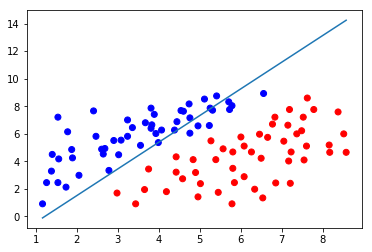

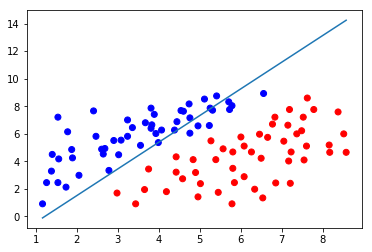

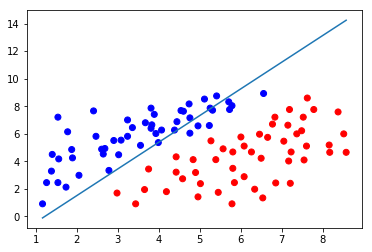

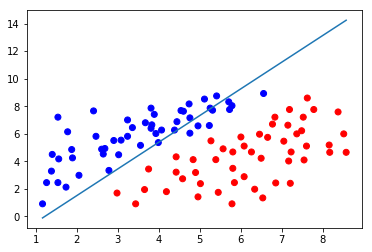

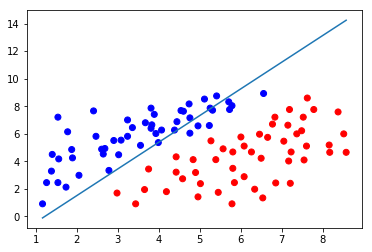

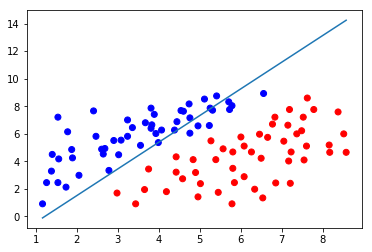

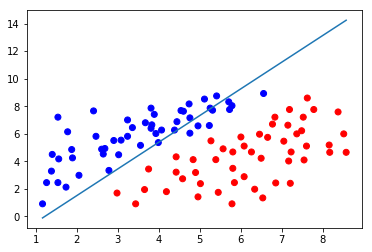

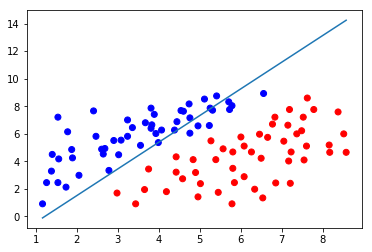

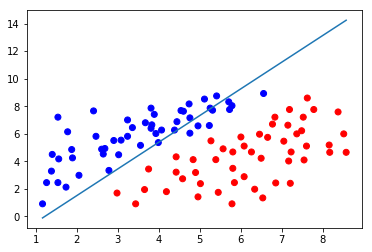

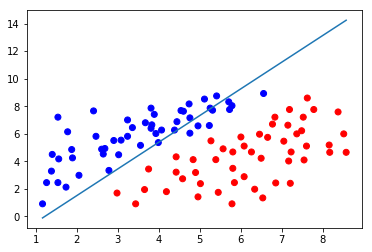

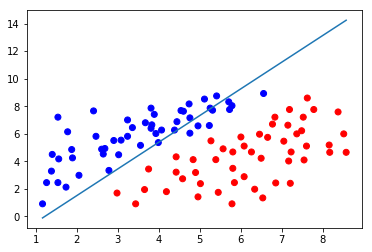

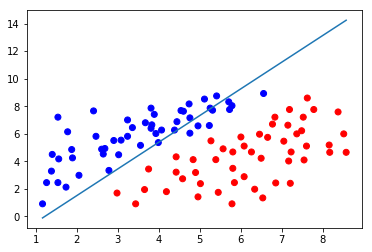

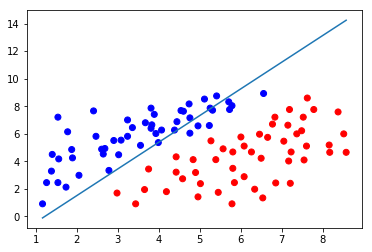

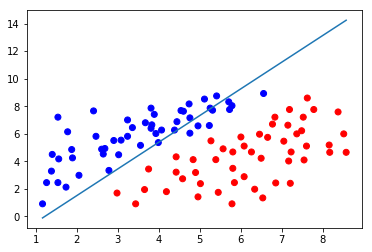

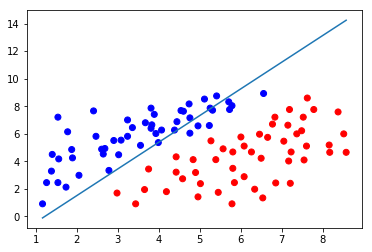

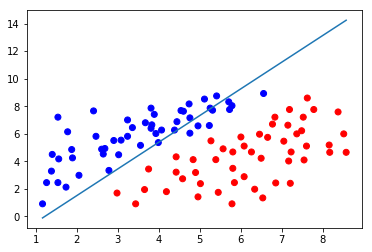

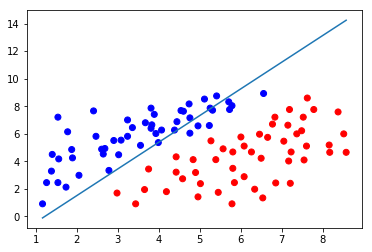

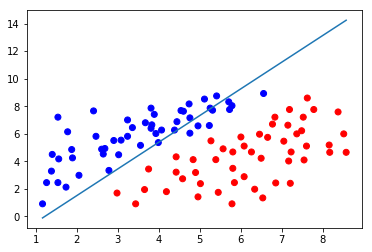

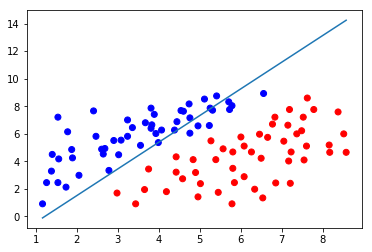

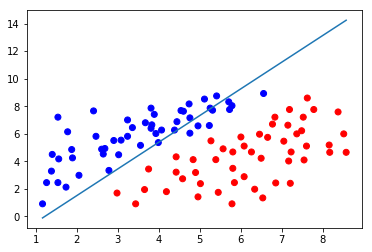

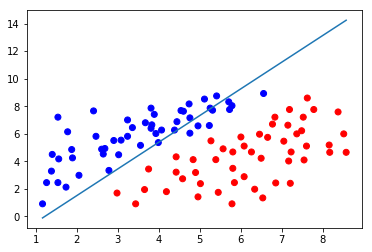

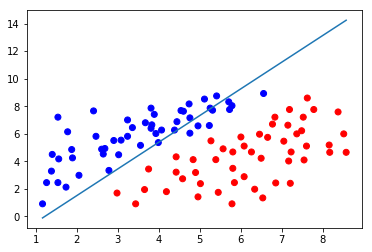

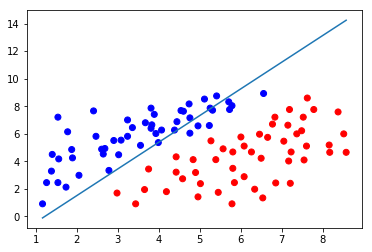

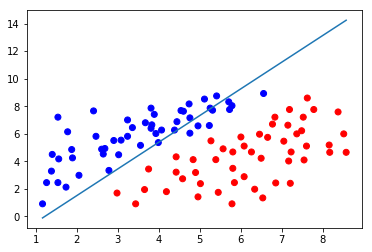

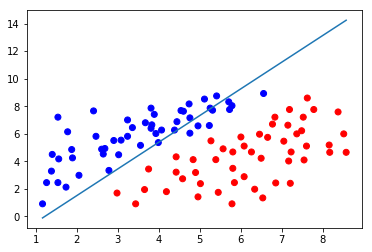

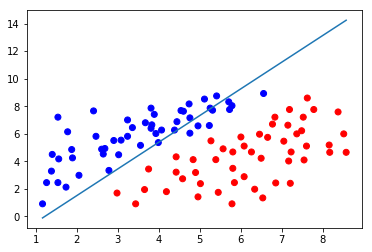

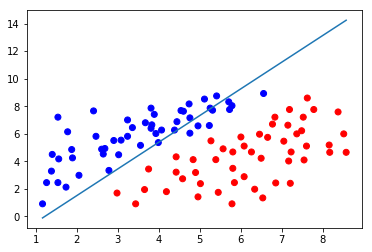

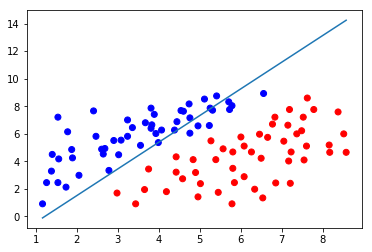

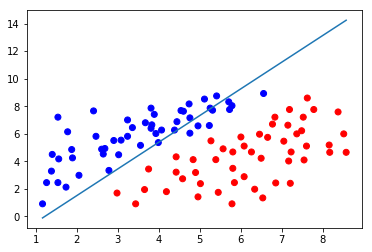

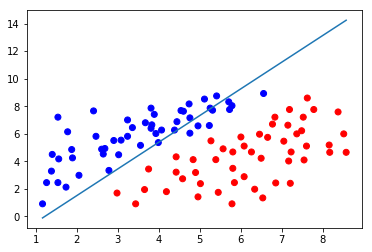

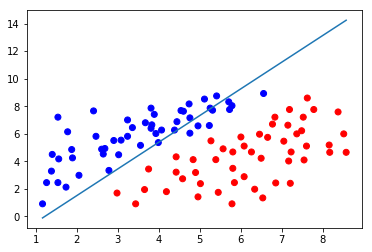

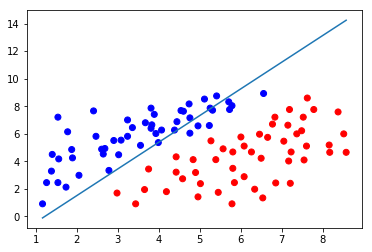

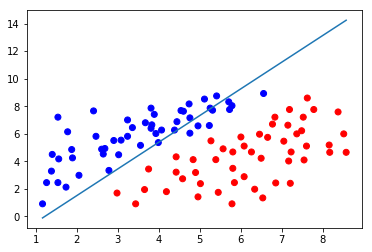

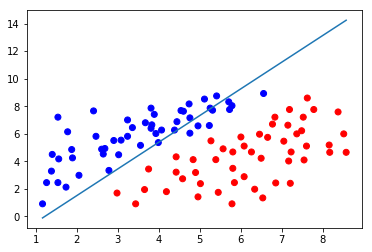

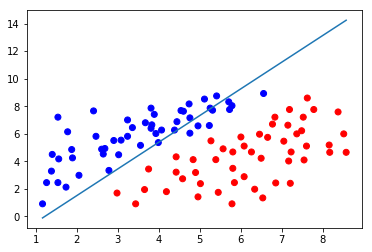

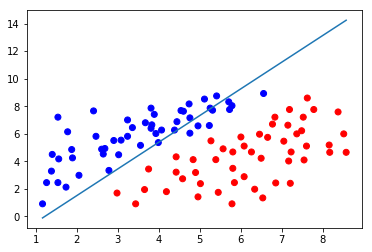

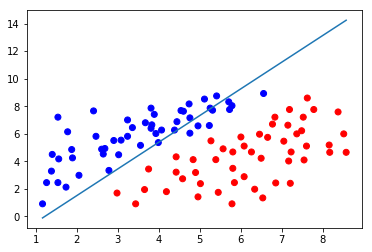

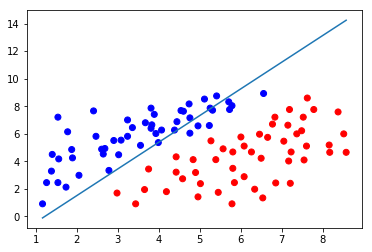

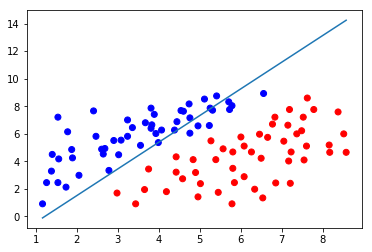

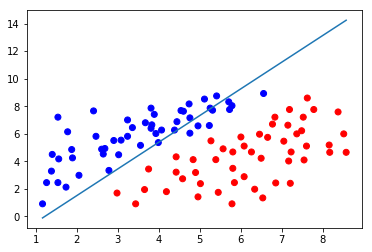

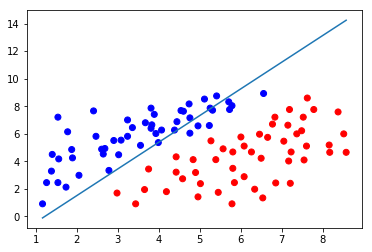

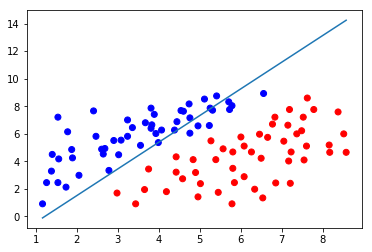

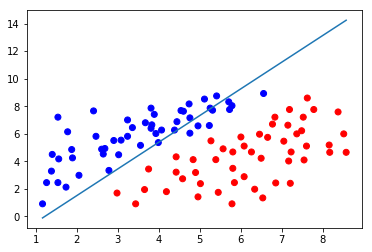

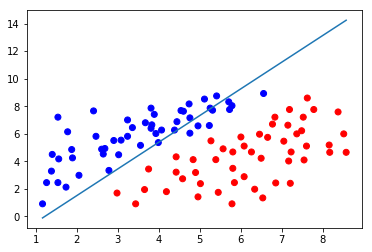

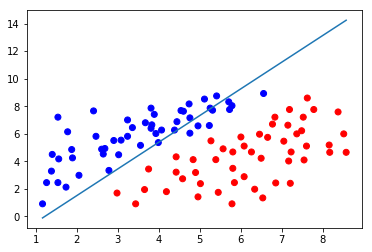

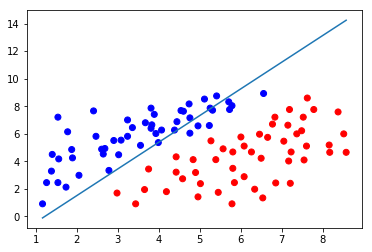

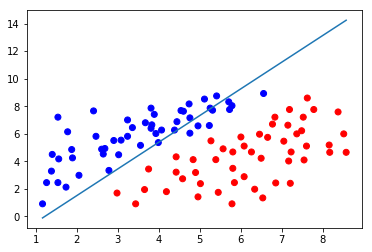

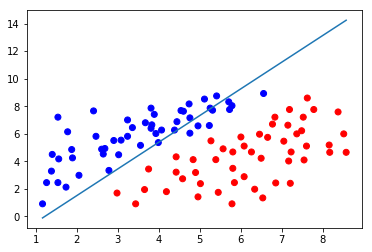

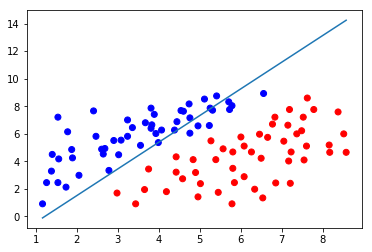

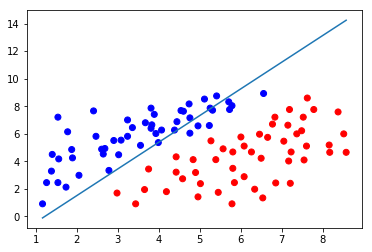

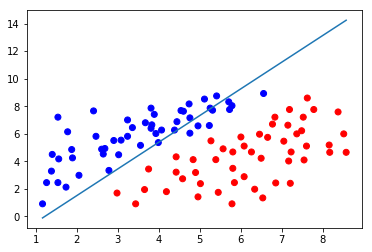

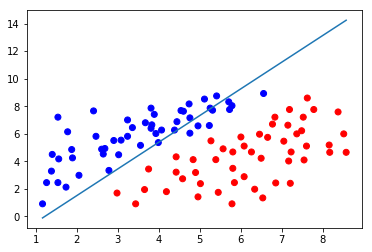

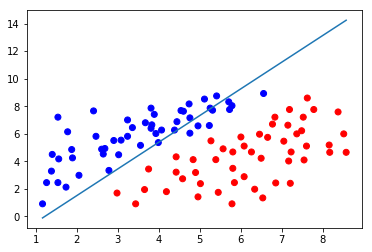

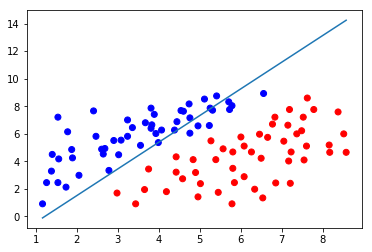

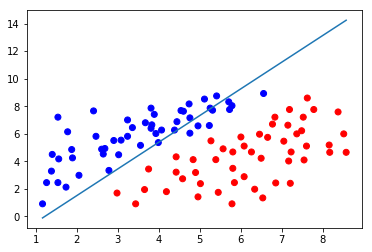

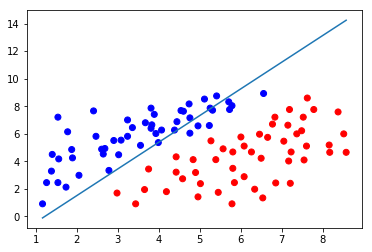

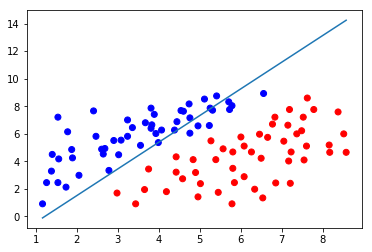

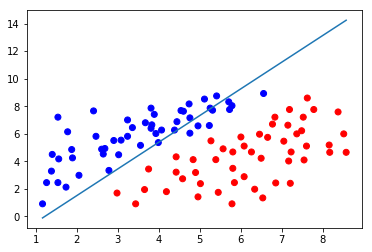

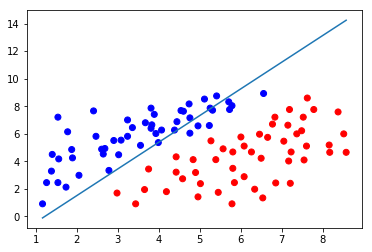

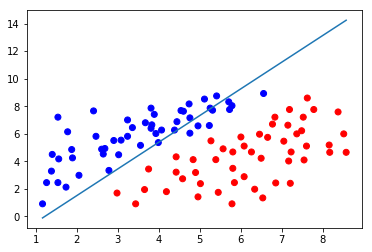

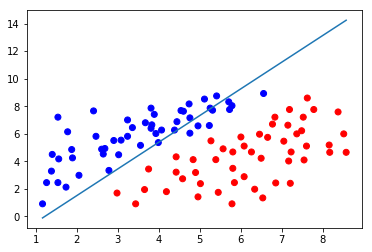

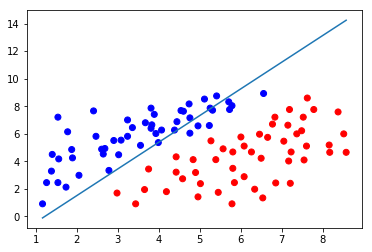

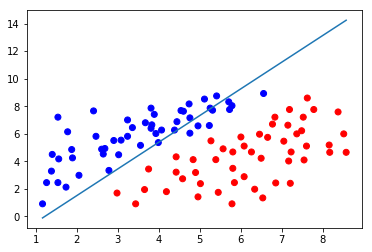

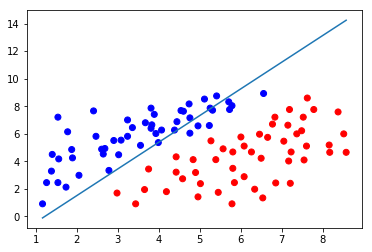

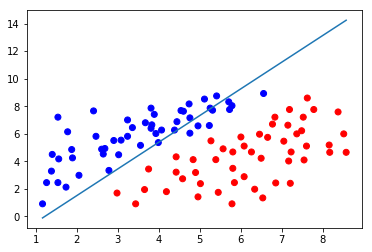

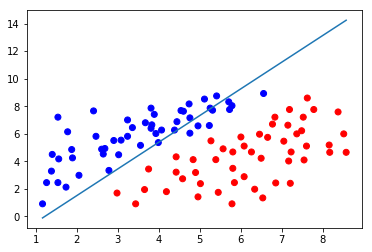

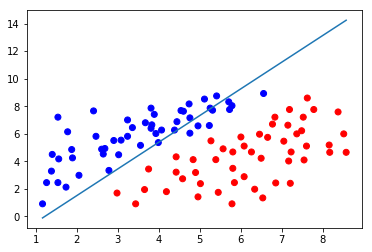

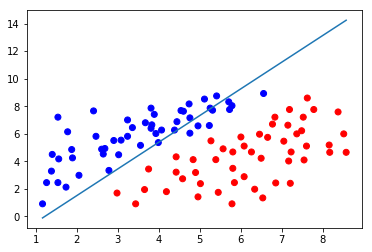

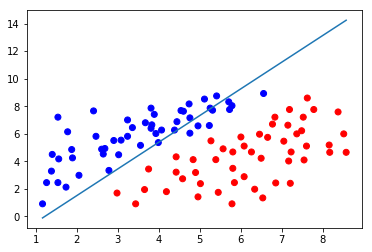

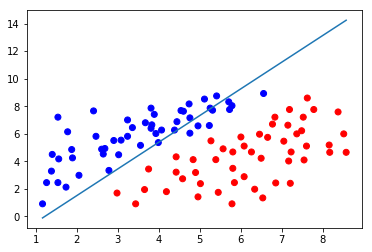

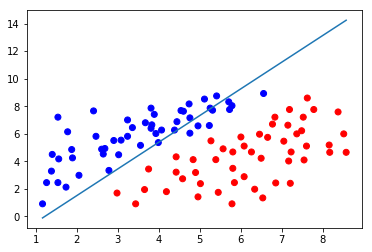

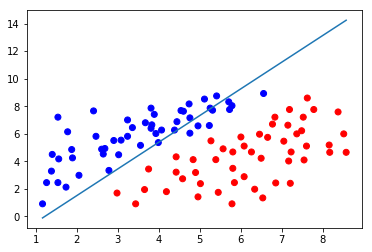

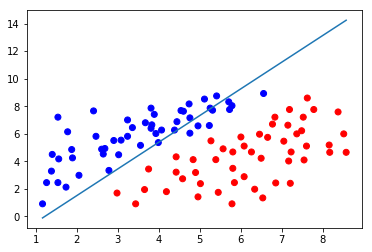

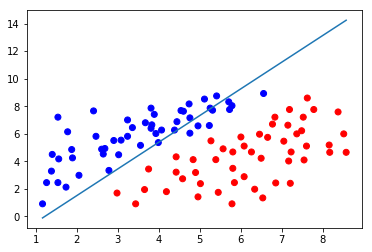

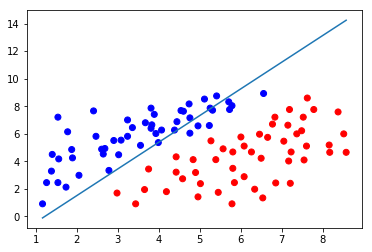

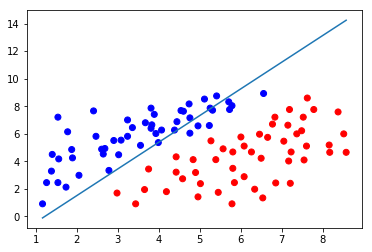

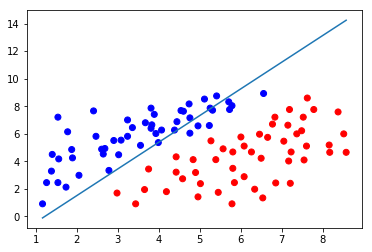

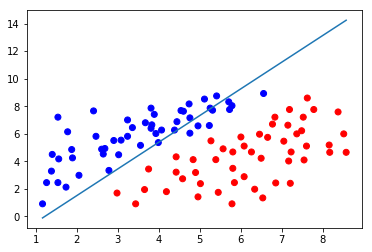

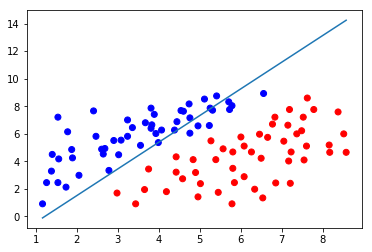

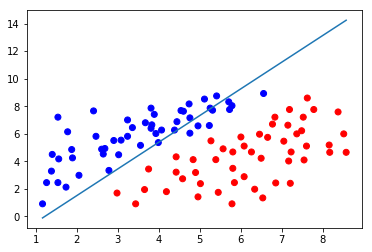

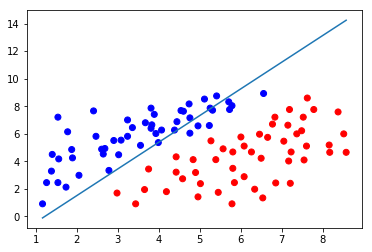

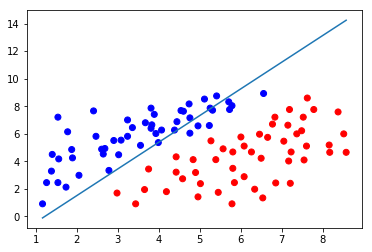

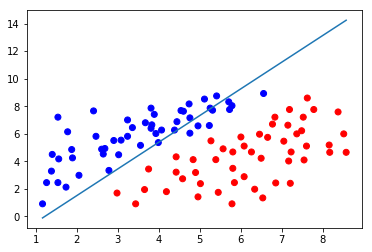

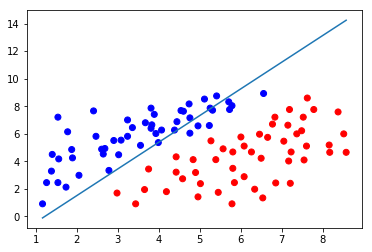

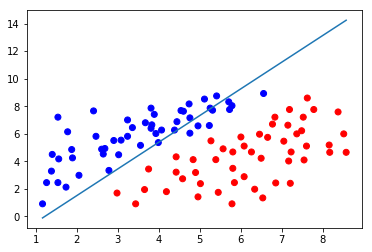

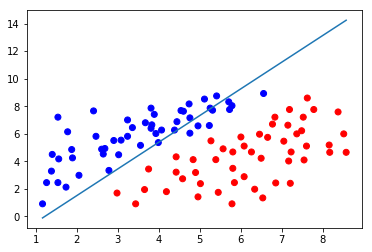

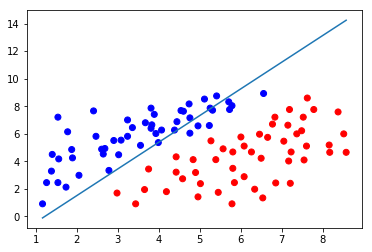

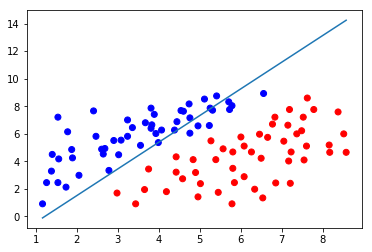

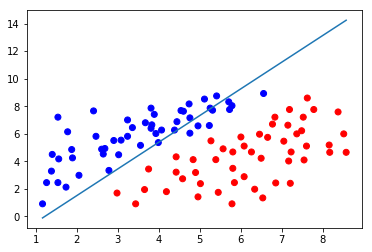

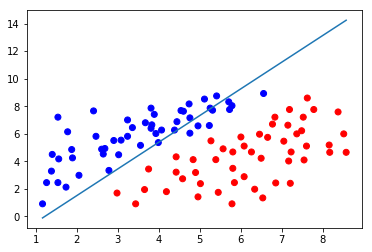

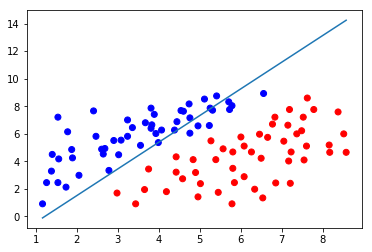

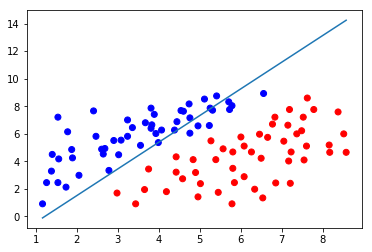

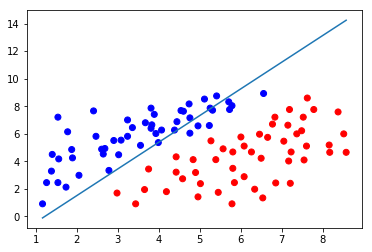

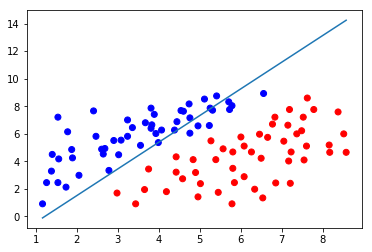

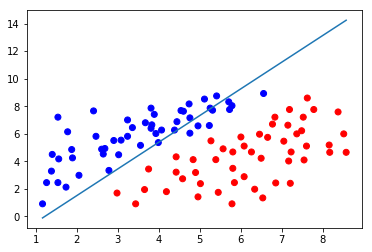

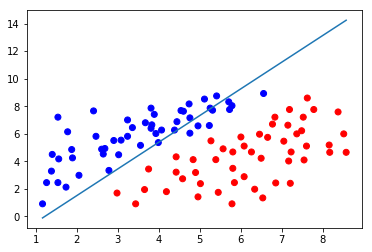

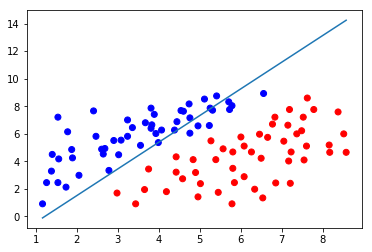

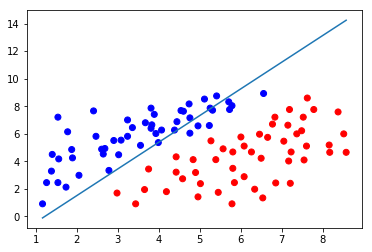

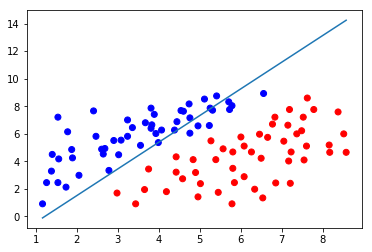

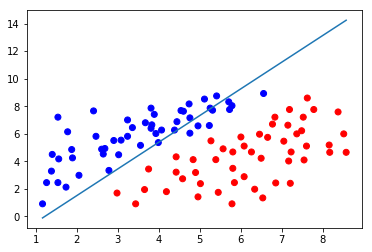

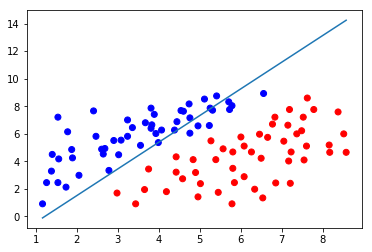

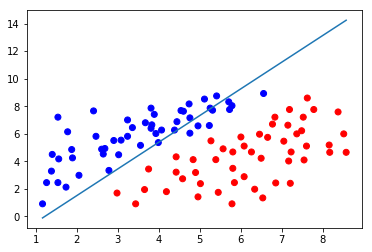

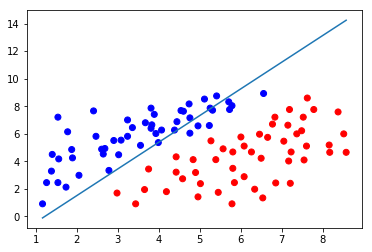

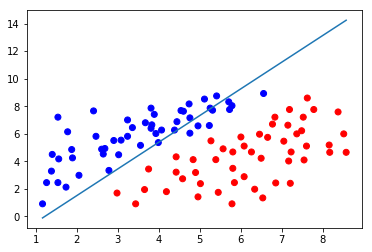

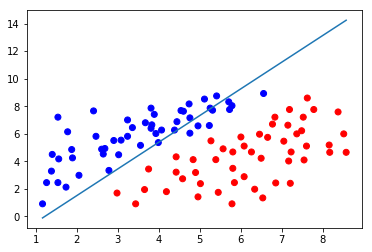

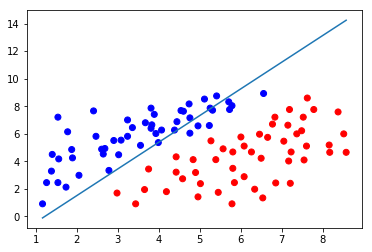

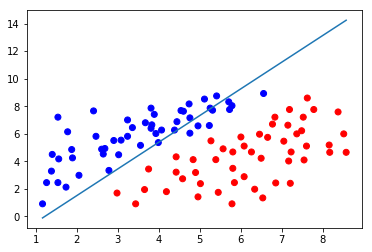

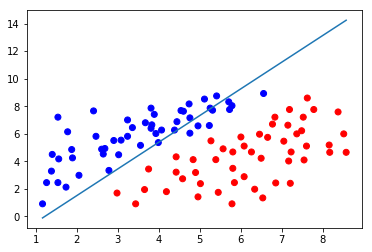

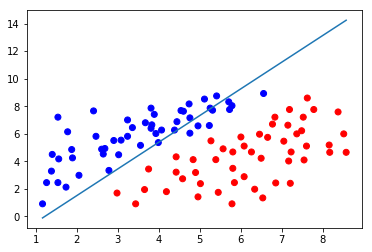

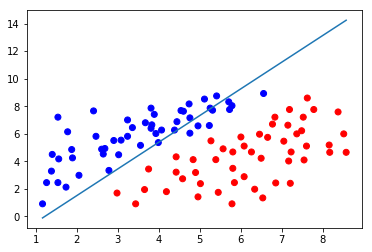

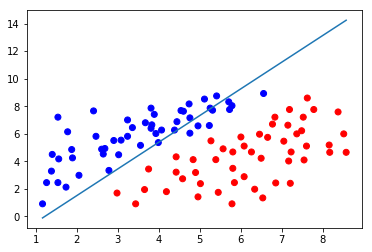

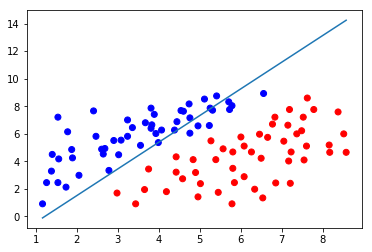

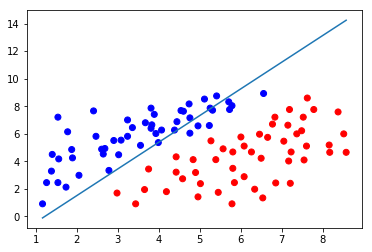

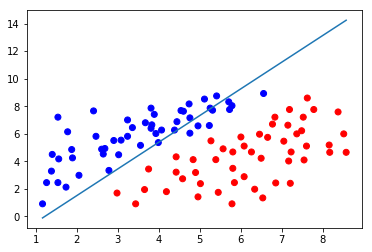

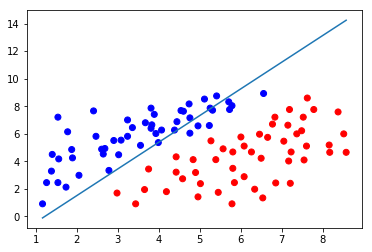

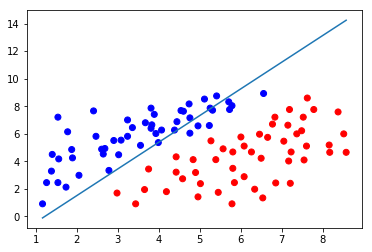

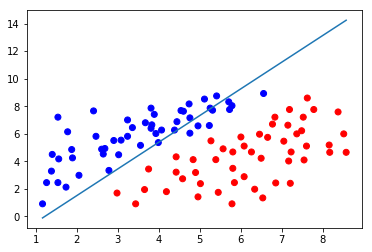

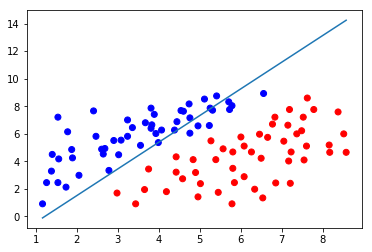

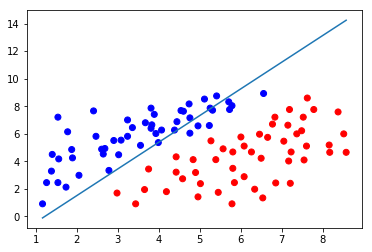

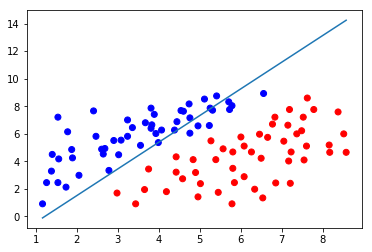

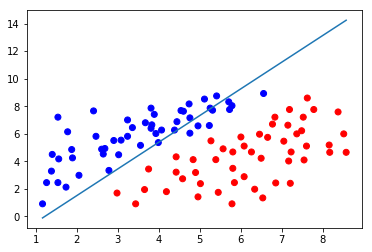

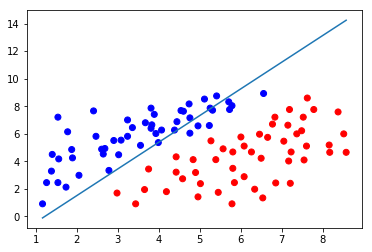

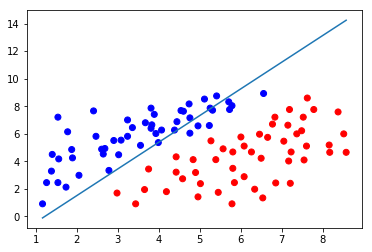

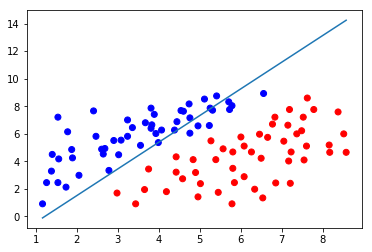

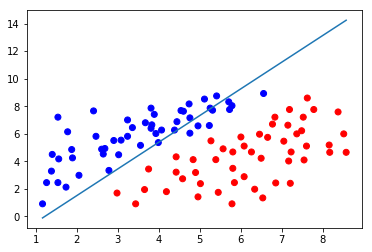

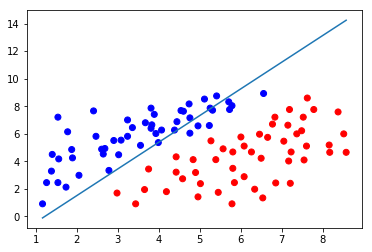

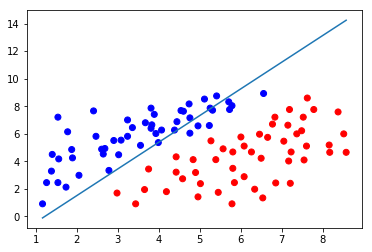

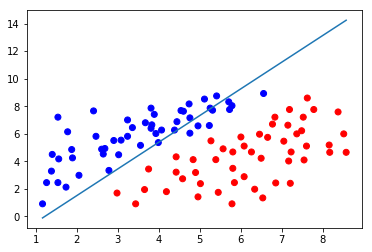

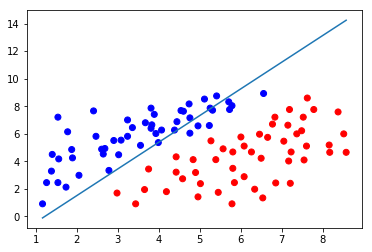

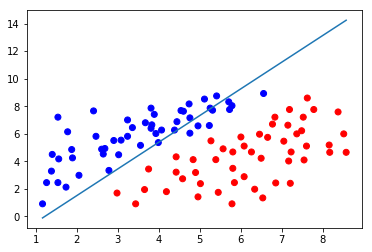

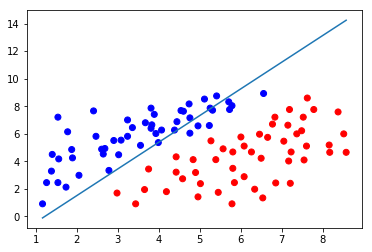

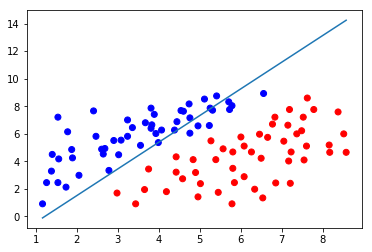

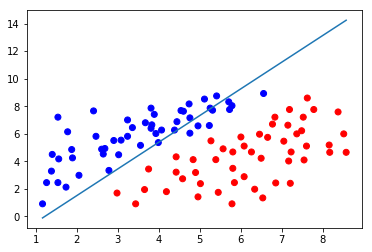

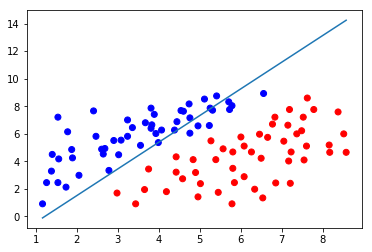

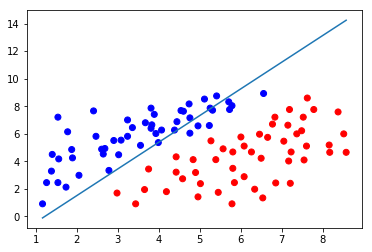

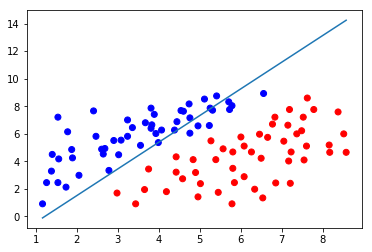

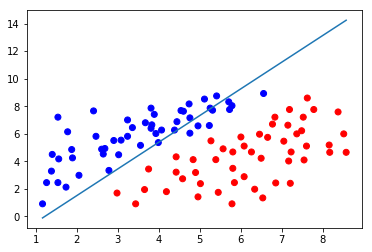

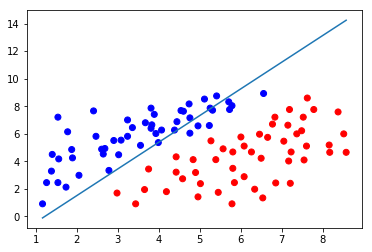

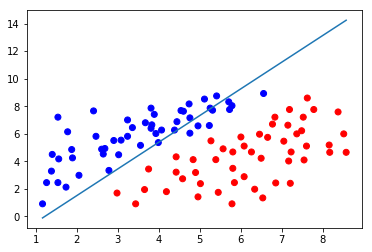

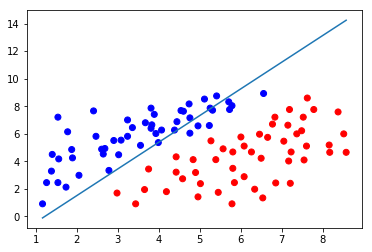

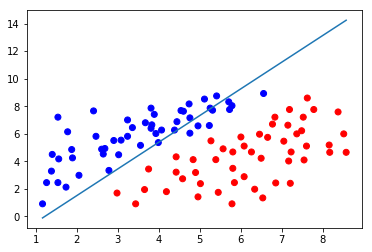

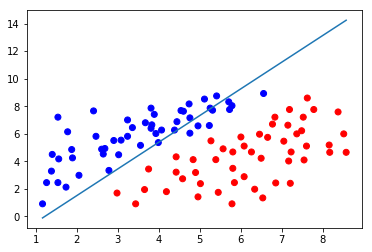

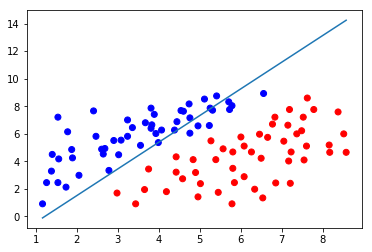

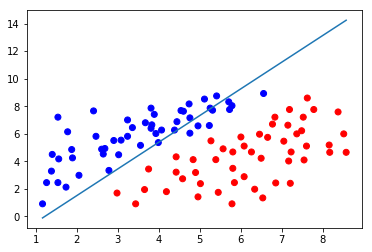

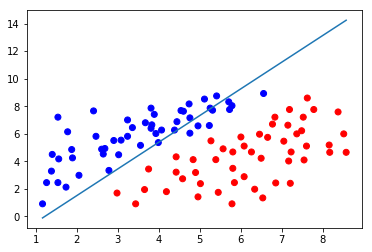

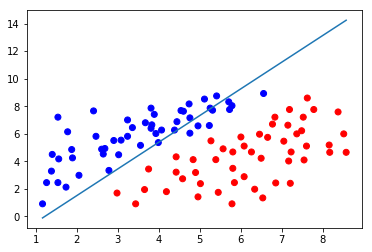

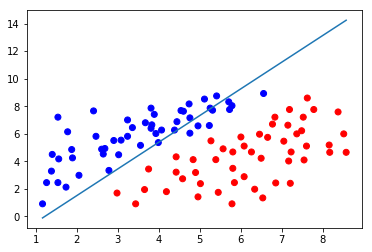

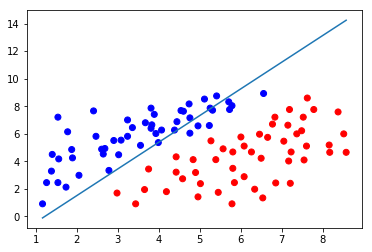

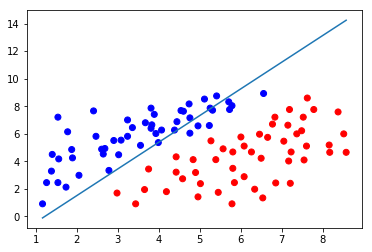

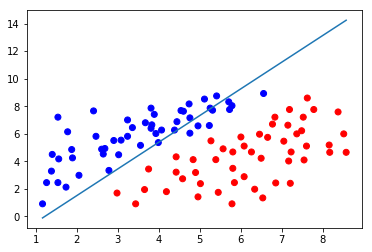

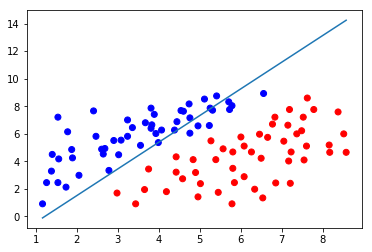

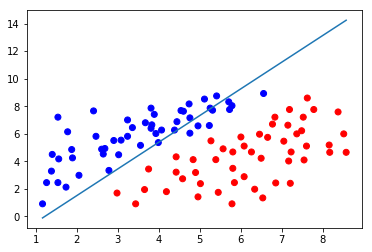

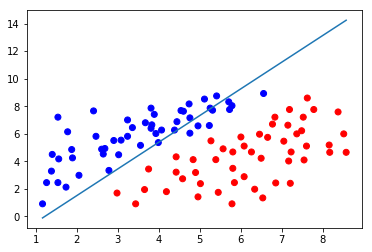

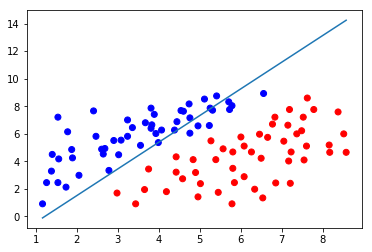

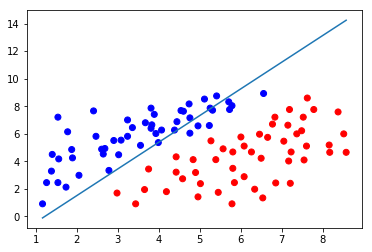

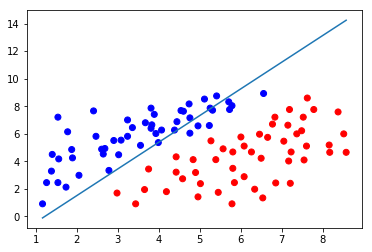

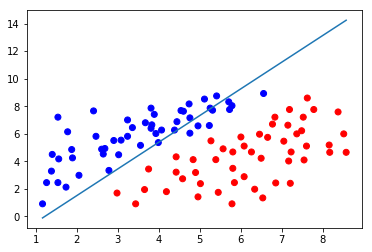

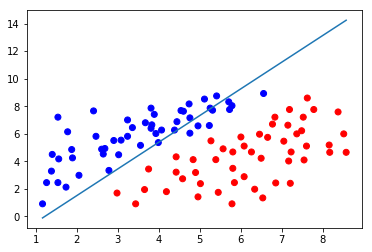

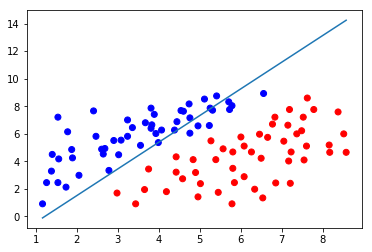

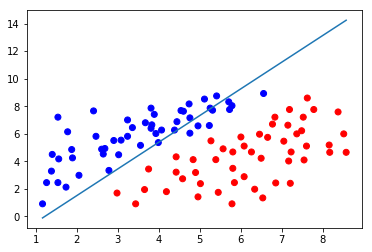

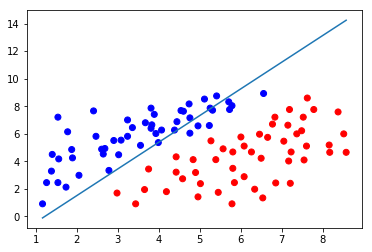

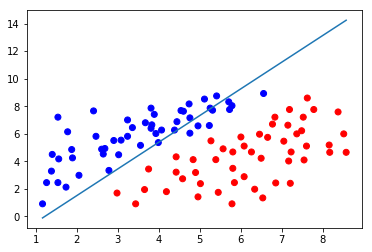

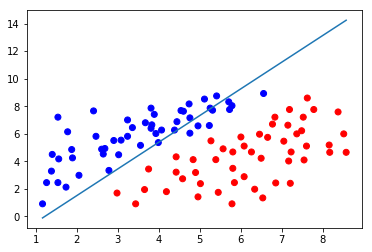

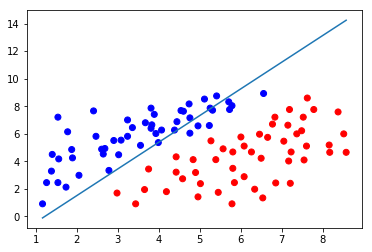

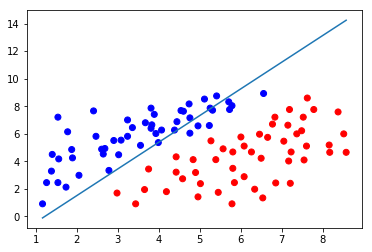

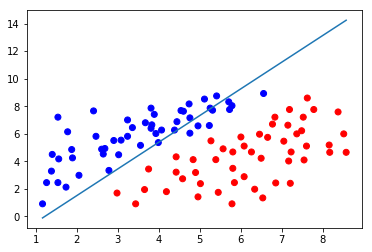

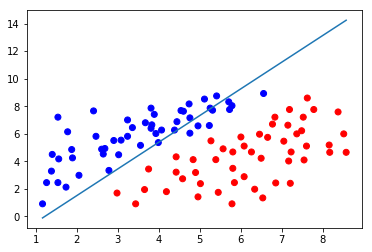

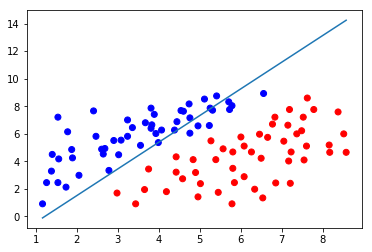

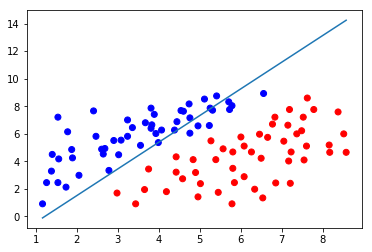

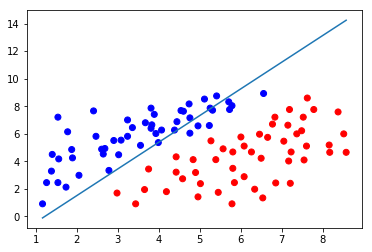

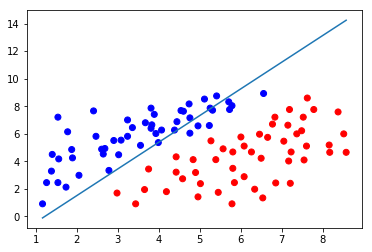

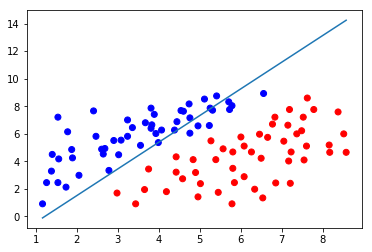

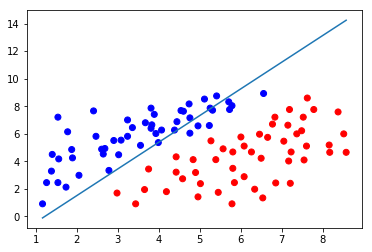

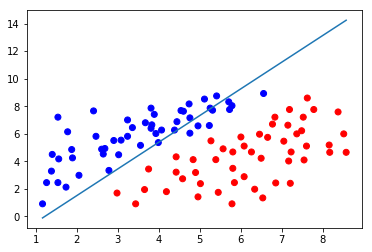

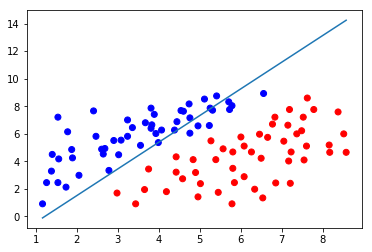

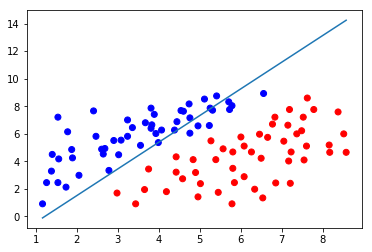

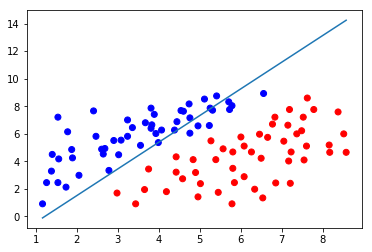

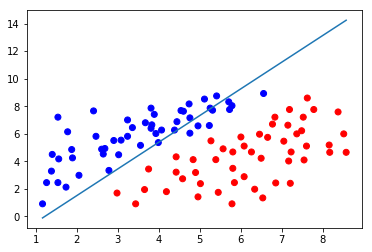

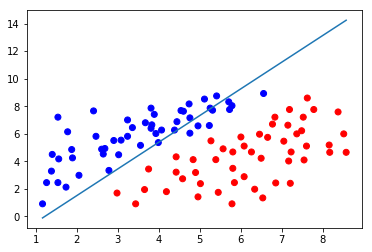

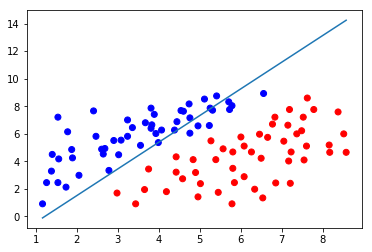

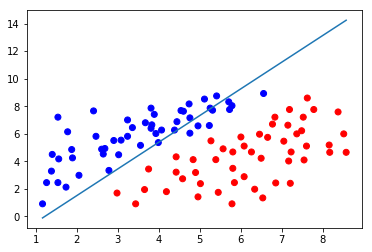

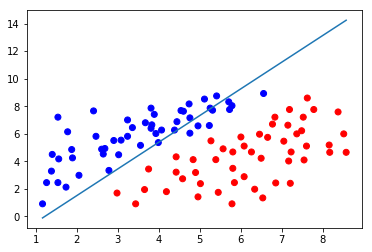

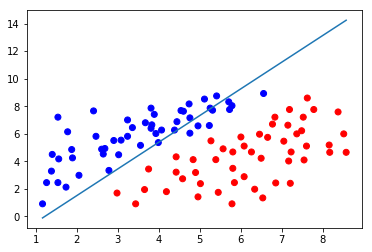

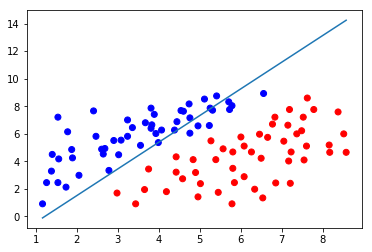

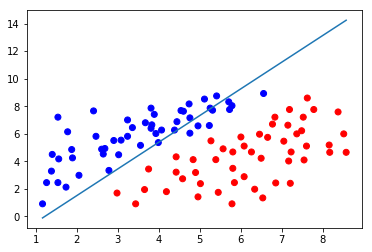

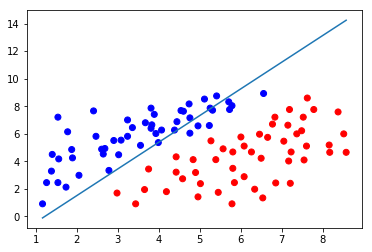

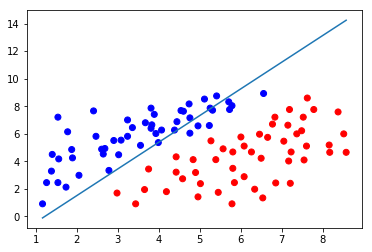

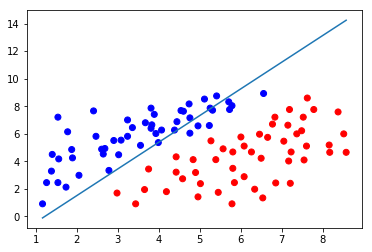

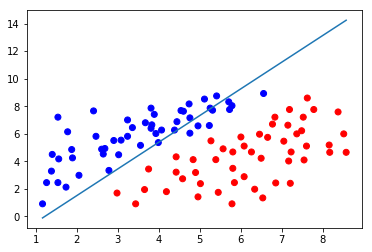

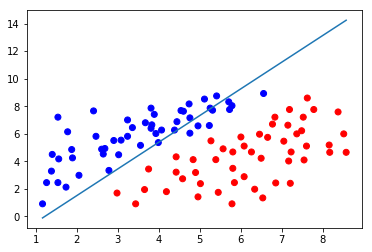

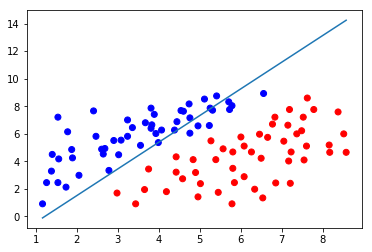

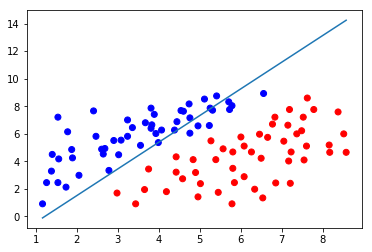

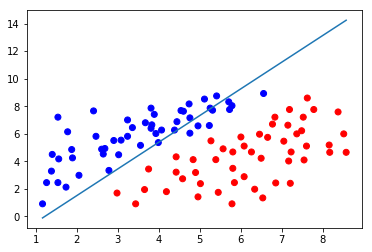

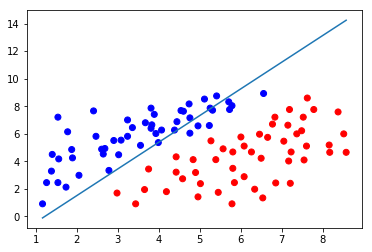

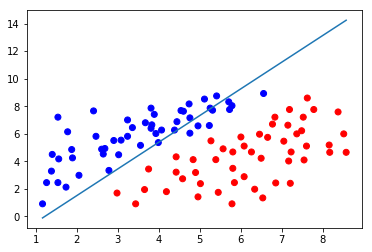

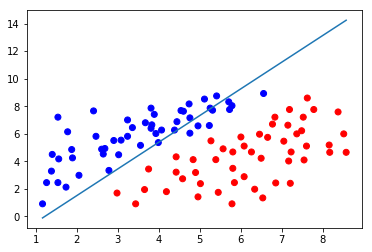

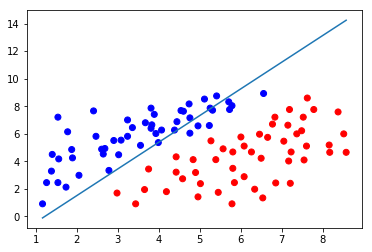

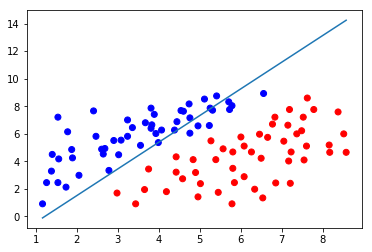

<Figure size 432x288 with 0 Axes>

In [13]:
w4 = adaline_learn(x1, x2, y, 0.01, 1.0)

# Aufgabe 4.3
- Offensichtlich war mit $\eta=0.001$ das Optimium der Lernrate noch nicht getroffen. Mit $\eta=0.0001$ gelangt man in nur 8 Iterationen zum Ziel.
- Erhöht man die Lernrate zu stark, etwa $\eta=0.01$, so konvergiert das Verfahren nicht. Hier stagnieren die Gewichte auf den Werten $\mathbf{w}= (0.5647915664615468, -0.4582484738161691, 0.23592337739561733)^T$.